# Bezier for litter pick up

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

In [2]:
import scipy

In [8]:
import matplotlib.pyplot as plt

def plot_points(points):
    # Create a new figure and axes
    fig, ax = plt.subplots()

    # Plot each point from the dictionary
    for name, position in points.items():
        ax.plot(position[0], position[1], 'o', markersize=10, label=name)

    # Add grid lines
    ax.grid(True)

    # Add legend
    ax.legend()

    # Set x and y axis labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    # Set title
    ax.set_title('Points')

    # Show the plot
    #plt.show()
    
    return fig, ax
    

def plot_curve(points, fig=None, ax=None, labels=None):
    # If figure and axes are not provided, create new ones
    if fig is None or ax is None:
        fig, ax = plt.subplots()
        # Add grid lines
        ax.grid(True)
        # Set x and y axis labels
        ax.set_xlabel('$$x [m]$$')
        ax.set_ylabel('$$y [m]$$')
        # Set title
        ax.set_title('Curve')
        ax.set_xlim(0, 10)
        ax.set_ylim(0, 10)
        
    x_coords = points[:, 0]
    y_coords = points[:, 1]
    
    # Extract x and y coordinates from the points array
    if points.shape[-1] == 3: 
        z_coords = points[:, 2]
        ax.plot(x_coords, y_coords, z_coords, 'o')            
        ax.set_zlabel('$$z [m]$$')
    else: 
        ax.plot(x_coords, y_coords, 'o-', markersize=5)

    # Show the plot
    #plt.show()
    #plt.savefig('BezierPrototype.svg')
    
    return fig, ax
    
    
def plot_points_3d(points, label_, graph_limits={"x":[-6, 6], "y":[0, 10], "z":[0, 5]}, labels=None, fig_=None, ax_=None):
    
    if fig_:
        fig, ax = fig_, ax_
    else: 
        # Create a new figure and subplot
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

    #plt.title('Planned waypoints', fontsize=20)

    # Set the graph limits
    ax.set_xlim((graph_limits["x"][0], graph_limits["x"][1]))
    ax.set_ylim((graph_limits["y"][0], graph_limits["y"][1]))
    ax.set_zlim((graph_limits["z"][0], graph_limits["z"][1]))

    # Extract x, y, and z coordinates from the points dictionary
    x = [point[0] for point in points.values()]
    y = [point[1] for point in points.values()]
    z = [point[2] for point in points.values()]

    # Plot the points in 3D
    ax.scatter(x, y, z, c='r', marker='o', label=label_)
    
    if labels is not None: 
            for i, label in enumerate(labels):
                ax.text(x[i], y[i], z[i], str(label), fontsize=12)

    # Set labels for the axes
    ax.set_xlabel('$$x [m]$$', fontsize=16)
    ax.set_ylabel('$$y [m]$$', fontsize=16)
    ax.set_zlabel('$$z [m]$$', fontsize=16)

    # Show the plot
    #plt.show()
    
    return fig, ax

# Bezier curves

<img src="bezier_eq.png">

<img src="bezier_quad_eq.png">

In [4]:
def create_linear_bezier_curve(p0, p1, p2, start_t=0, end_t=1, dt=0.01): 
    
    p0 = np.array(p0); p1 = np.array(p1); p2 = np.array(p2)
    
    #print(p0, p1, p2)
    
    # Create p in dimension 1, X
    p0 = p0.reshape(1, p0.shape[0])
    p1 = p1.reshape(1, p1.shape[0])
    p2 = p2.reshape(1, p2.shape[0])
    
    # Create t in dimension X, 1
    N = int((end_t - start_t) / dt)
    t = np.linspace(start_t, end_t, N).reshape(N, 1)
    
    # Bezier curve
    B = (1 - t)*((1 - t) * p0 + t*p1) + t*[(1 - t) * p1 + t*p2]
    
    return B.squeeze()

def create_quadratic_bezier_curve(p0, p1, p2, start_t=0, end_t=1, dt=0.01):
    
    p0 = np.array(p0); p1 = np.array(p1); p2 = np.array(p2)
    
    #print(p0, p1, p2)
    
    # Create p in dimension 1, X
    p0 = p0.reshape(1, p0.shape[0])
    p1 = p1.reshape(1, p1.shape[0])
    p2 = p2.reshape(1, p2.shape[0])
    
    # Create t in dimension X, 1
    N = int((end_t - start_t) / dt)
    t = np.linspace(start_t, end_t, N).reshape(N, 1)
    
    # Bezier quadratic curve
    Bquad = ((1-t)**2)*p0 + 2*(1-t)*t*p1 + t**2*p2
    
    return Bquad.squeeze()
    
    # Quadratic Bezier Curve
    

# 1st Scenario

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Points'}, xlabel='X', ylabel='Y'>)

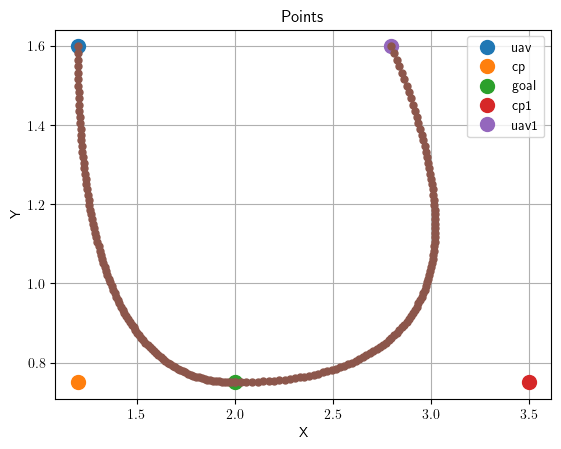

In [5]:
pts_ = {"uav": (1.2, 1.6), 
        "cp": (1.2, 0.75), 
       "goal": (2, 0.75),
        "cp1": (3.5, 0.75), 
        "uav1": (2.8, 1.6)}

fig0, ax0 = plot_points(pts_)
Bquad1 = create_quadratic_bezier_curve( pts_["uav"], pts_["cp"], pts_["goal"])
Bquad2 = create_quadratic_bezier_curve( pts_["goal"], pts_["cp1"], pts_["uav1"])

Bquad_complete = np.vstack((Bquad1, Bquad2))
plot_curve(Bquad_complete, fig0, ax0)
#plot_curve(Bquad2, fig0, ax0)




# 2nd scenario 3D 

In [6]:
pts_ = {"uav": (, 8, 3), 
        "cp": (9, 8, 1), 
       "goal": (3, 8, 1)}

print(pts_.values())

fig0, ax0 = plot_points_3d(pts_)
Bquad = create_quadratic_bezier_curve( pts_["uav"], pts_["cp"], pts_["goal"], dt=0.05)
fig0, ax0 = plot_curve(Bquad, fig0, ax0)

    

SyntaxError: invalid syntax (2807498036.py, line 1)

dict_values([(9, 8, 3), (9, 8, 1), (3, 8, 1), (-3, 8, 1), (-3, 8, 3)])


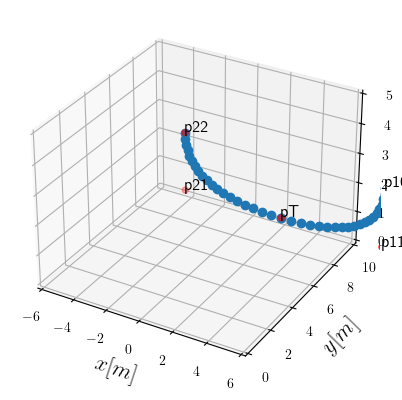

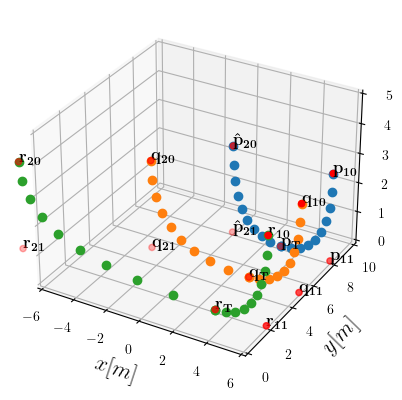

In [9]:
pts_ = {"uav": (9, 8, 3), 
        "cp": (9, 8, 1), 
       "goal": (3, 8, 1), 
       "cp1": (-3, 8, 1), 
       "uav1": (-3, 8, 3)}

print(pts_.values())

fig0, ax0 = plot_points_3d(pts_, "$$\alpha=1$$", labels=['p10', 'p11', 'pT', 'p21', 'p22'])
Bquad1 = create_quadratic_bezier_curve( pts_["uav"], pts_["cp"], pts_["goal"], dt=0.05)
Bquad2 = create_quadratic_bezier_curve( pts_["goal"], pts_["cp1"], pts_["uav1"], dt=0.05)

Bcomplete = np.vstack((Bquad1, Bquad2))
fig0, ax0 = plot_curve(Bcomplete, fig0, ax0)


pts_ = {"uav": (6, 8, 3), 
        "cp": (6, 8, 0), 
       "goal": (3, 8, 0), 
       "cp1": (0, 8, 0), 
       "uav1": (0, 8, 3)}

pts2_ = {"uav": (6, 5, 3), 
        "cp": (6, 5, 0), 
       "goal": (3, 5, 0), 
       "cp1": (-3, 5, 0), 
       "uav1": (-3, 5, 3)}

pts3_ = {"uav": (6, 2, 3), 
        "cp": (6, 2, 0), 
       "goal": (3, 2, 0), 
       "cp1": (-9, 2, 0), 
       "uav1": (-9, 2, 3)}

fig0, ax0 = plot_points_3d(pts_, "$$\alpha =1 $$", labels=[r'$\mathbf{p_{10}}$', r'$\mathbf{p_{11}}$', r'$\mathbf{p_{T}}$', r'$\mathbf{\hat{p}_{21}}$', r'$\mathbf{\hat{p}_{20}}$']) 
Bquad1 = create_quadratic_bezier_curve( pts_["uav"], pts_["cp"], pts_["goal"], dt=0.1)
Bquad2 = create_quadratic_bezier_curve( pts_["goal"], pts_["cp1"], pts_["uav1"], dt=0.1)
Bquad3 = create_quadratic_bezier_curve( pts2_["uav"], pts2_["cp"], pts2_["goal"], dt=0.1)
Bquad4 = create_quadratic_bezier_curve( pts2_["goal"], pts2_["cp1"], pts2_["uav1"], dt=0.1)
Bquad5 = create_quadratic_bezier_curve( pts3_["uav"], pts3_["cp"], pts3_['goal'], dt=0.1)
Bquad6 = create_quadratic_bezier_curve( pts3_["goal"], pts3_["cp1"], pts3_['uav1'], dt=0.1)

# Stack Beziers
Bcomplete1 = np.vstack((Bquad1, Bquad2))
Bcomplete2 = np.vstack((Bquad3, Bquad4))
Bcomplete3 = np.vstack((Bquad5, Bquad6))

# Stack graphs
fig0, ax0 = plot_curve(Bcomplete1, fig0, ax0)
fig0, ax0 = plot_points_3d(pts2_, "$$\alpha = 2$$", labels=[r'$\mathbf{q_{10}}$', r'$\mathbf{q_{11}}$', r'$\mathbf{q_{T}}$', r'$\mathbf{q_{21}}$', r'$\mathbf{q_{20}}$'], fig_=fig0, ax_=ax0) 
fig0, ax0 = plot_curve(Bcomplete2, fig0, ax0)
fig0, ax0 = plot_points_3d(pts3_, "$$\alpha = 3$$", labels=[r'$\mathbf{r_{10}}$', r'$\mathbf{r_{11}}$', r'$\mathbf{r_{T}}$', r'$\mathbf{r_{21}}$', r'$\mathbf{r_{20}}$'], fig_=fig0, ax_=ax0)
fig0, ax0 = plot_curve(Bcomplete3, fig0, ax0)
#fig0.legend()
#fig0.show()
fig0.savefig('BezierPrototype.png')


In [35]:
pts_ = {"uav": (9, 8, 3), 
        "cp": (9, 8, 1), 
       "goal": (3, 8, 1), 
       "cp1": (-3, 8, 1), 
       "uav1": (-3, 8, 3)}


x_dist = 5
y_dist = 5

def create_pts(start_point, goal_point, x_dist, y_dist, cp_h):
    
    cp1 = (start_point[0], start_point[1], start_point[2] - cp_h) 
    cp2 = (start_point[0] + x_dist, start_point[1] + y_dist, start_point[2] - cp_h)
    end_point = (start_point[0] + x_dist, start_point[1] + y_dist, start_point[2])
    
    pts = {"start": start_point, 
          "goal": goal_point, 
          "cp1": cp1, 
          "cp2": cp2, 
          "end": end_point}
    return pts 

    
    

## Two questions arise: 

- How to plan for the net (ARUCO marker, kinematic chain, it is an end effector for which we are planning) 
- Why bezier (nice position profile)--> use that bezier as a input to the MPC tracker?

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Polygons 

In [37]:
import random

def generate_random_polygon(num_vertices, width, height):
    if num_vertices < 3:
        raise ValueError("A polygon must have at least 3 vertices.")

    x_coords = [random.uniform(0, width) for _ in range(num_vertices)]
    y_coords = [random.uniform(0, height) for _ in range(num_vertices)]

    # Sort the x and y coordinates based on the x values only
    sorted_indices = sorted(range(num_vertices), key=lambda i: x_coords[i])
    x_coords = [x_coords[i] for i in sorted_indices]
    y_coords = [y_coords[i] for i in sorted_indices]

    # Create the polygon using the sorted x and y coordinates
    polygon = [(x, y) for x, y in zip(x_coords, y_coords)]

    return polygon

from scipy.spatial import ConvexHull

def generate_concave_polygon(num_vertices, width, height):
    if num_vertices < 3:
        raise ValueError("A polygon must have at least 3 vertices.")

    # Generate random x and y coordinates within the specified range
    x_coords = [random.uniform(0, width) for _ in range(num_vertices)]
    y_coords = [random.uniform(0, height) for _ in range(num_vertices)]

    # Create a set of points by combining x and y coordinates
    points = list(zip(x_coords, y_coords))

    # Compute the convex hull of the points
    hull = ConvexHull(points)
    convex_hull_vertices = [points[i] for i in hull.vertices]

    # Introduce new points within the convex hull to create concave angles
    concave_polygon = convex_hull_vertices.copy()

    for _ in range(num_vertices - len(convex_hull_vertices)):
        random_vertex = random.choice(convex_hull_vertices)
        new_vertex = (
            random.uniform(random_vertex[0] - 0.5, random_vertex[0] + 0.5),
            random.uniform(random_vertex[1] - 0.5, random_vertex[1] + 0.5),
        )
        concave_polygon.append(new_vertex)

    return concave_polygon

def generate_convex_polygon(num_vertices, width, height):
    if num_vertices < 3:
        raise ValueError("A polygon must have at least 3 vertices.")

    # Generate random x and y coordinates within the specified range
    x_coords = [random.uniform(0, width) for _ in range(num_vertices)]
    y_coords = [random.uniform(0, height) for _ in range(num_vertices)]

    # Create a set of points by combining x and y coordinates
    points = list(zip(x_coords, y_coords))

    # Compute the convex hull of the points
    hull = ConvexHull(points)
    convex_polygon = [points[i] for i in hull.vertices]

    return convex_polygon

In [38]:
# Example usage:
num_vertices = 5
random_polygon = generate_random_polygon(num_vertices, 1280, 768)
print(random_polygon)


[(149.05140184002818, 280.35079752135687), (149.6475472782366, 735.1552811457861), (193.04894651693672, 732.8929109517761), (1050.5492608141915, 175.2907381663402), (1256.2224948677188, 294.5456401399348)]


In [12]:
import matplotlib.patches as patches

def plot_polygon(polygon):
    # Extract x and y coordinates from the polygon
    x_coords, y_coords = zip(*polygon)

    # Close the polygon by repeating the first vertex at the end
    x_coords += (x_coords[0],)
    y_coords += (y_coords[0],)

    # Plot the polygon using matplotlib patch
    fig, ax = plt.subplots()
    polygon_patch = patches.Polygon(xy=list(zip(x_coords, y_coords)), edgecolor='b', facecolor='none')
    ax.add_patch(polygon_patch)

    # Set axis limits and labels
    plt.xlim(min(x_coords) - 1, max(x_coords) + 1)
    plt.ylim(min(y_coords) - 1, max(y_coords) + 1)
    plt.xlabel('$$x [m]')
    plt.ylabel('$$y [m]')
    
    plt.title('Random 2D Polygon')
    plt.grid(True)
    plt.axis('equal')
    plt.show()


# Example usage:
num_vertices = 8
random_polygon = generate_random_polygon(num_vertices, 1280, 768)
concave_polygon = generate_concave_polygon(num_vertices, 1280, 768)
convex_polygon = generate_convex_polygon(num_vertices, 1280, 768)
plot_polygon(random_polygon)
plot_polygon(concave_polygon)
plot_polygon(convex_polygon)

RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmp244p7xuv 844f707e0917555faafa721cd5105dbd.tex

This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./844f707e0917555faafa721cd5105dbd.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)

! LaTeX Error: File `type1ec.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.8 \usepackage
               [utf8]{inputenc}^^M
No pages of output.
Transcript written on tmp244p7xuv/844f707e0917555faafa721cd5105dbd.log.




<Figure size 640x480 with 1 Axes>

RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpu0veu_2z 844f707e0917555faafa721cd5105dbd.tex

This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./844f707e0917555faafa721cd5105dbd.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)

! LaTeX Error: File `type1ec.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.8 \usepackage
               [utf8]{inputenc}^^M
No pages of output.
Transcript written on tmpu0veu_2z/844f707e0917555faafa721cd5105dbd.log.




<Figure size 640x480 with 1 Axes>

RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpq5lcots4 844f707e0917555faafa721cd5105dbd.tex

This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./844f707e0917555faafa721cd5105dbd.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)

! LaTeX Error: File `type1ec.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.8 \usepackage
               [utf8]{inputenc}^^M
No pages of output.
Transcript written on tmpq5lcots4/844f707e0917555faafa721cd5105dbd.log.




<Figure size 640x480 with 1 Axes>

In [13]:
def calculate_diagonals(polygon):
    num_vertices = len(polygon)
    diagonals = []

    for i in range(num_vertices):
        for j in range(i + 2, num_vertices + i - 1):
            j %= num_vertices
            if j != i and j != (i + 1) % num_vertices:
                diagonals.append((polygon[i], polygon[j]))

    return diagonals

def plot_polygon_with_diagonals(polygon, diagonals):
    # Extract x and y coordinates from the polygon
    x_coords, y_coords = zip(*polygon)

    # Close the polygon by repeating the first vertex at the end
    x_coords += (x_coords[0],)
    y_coords += (y_coords[0],)

    # Plot the polygon using matplotlib patch
    fig, ax = plt.subplots()
    polygon_patch = patches.Polygon(xy=list(zip(x_coords, y_coords)), edgecolor='b', facecolor='none')
    ax.add_patch(polygon_patch)

    # Plot the diagonals
    for diagonal in diagonals:
        x_coords, y_coords = zip(*diagonal)
        plt.plot(x_coords, y_coords, 'r--')

    # Set axis limits and labels
    plt.xlim(min(x_coords) - 1, max(x_coords) + 1)
    plt.ylim(min(y_coords) - 1, max(y_coords) + 1)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Polygon with Diagonals')
    plt.grid(True)
    plt.axis('equal')
    plt.show()

# Example usage:
num_vertices = 3
width = 10
height = 10
random_polygon = generate_convex_polygon(num_vertices, width, height)
print("Polygon vertices:", random_polygon)

diagonals = calculate_diagonals(random_polygon)
print("Diagonals:", diagonals)

Polygon vertices: [(5.941285074841205, 9.99239815748599), (0.675677588310174, 9.882765685410677), (1.3369663883974359, 4.405290125806455)]
Diagonals: []


In [14]:
plot_polygon_with_diagonals(random_polygon, diagonals)

RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpyxh80x1p 844f707e0917555faafa721cd5105dbd.tex

This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./844f707e0917555faafa721cd5105dbd.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)

! LaTeX Error: File `type1ec.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.8 \usepackage
               [utf8]{inputenc}^^M
No pages of output.
Transcript written on tmpyxh80x1p/844f707e0917555faafa721cd5105dbd.log.




<Figure size 640x480 with 1 Axes>

In [15]:
from shapely.geometry import LineString

def find_intersections(diagonals):
    intersections = []

    # Check all possible pairs of diagonals for intersections
    for i in range(len(diagonals)):
        for j in range(i + 1, len(diagonals)):
            line1 = LineString(diagonals[i])
            line2 = LineString(diagonals[j])

            # Check if the two lines intersect
            if line1.intersects(line2):
                intersection_point = line1.intersection(line2)
                if intersection_point.geom_type == 'Point':
                    intersection = intersection_point.x, intersection_point.y
                    if intersection not in intersections:
                        intersections.append(intersection)

    return intersections

# Example usage:
num_vertices = 5
width = 10
height = 10
random_polygon = generate_convex_polygon(num_vertices, width, height)
print("Polygon vertices:", random_polygon)

diagonals = calculate_diagonals(random_polygon)
print("Diagonals:", diagonals)

intersections = find_intersections(diagonals)
print("Intersections:", intersections)


Polygon vertices: [(5.659836535633286, 5.773496164664827), (1.582575229693317, 2.7180257627660387), (4.202433464750093, 1.5255474242180211), (8.453781179922132, 1.929040070752609), (6.193178260512472, 5.543759235246987)]
Diagonals: [((5.659836535633286, 5.773496164664827), (4.202433464750093, 1.5255474242180211)), ((5.659836535633286, 5.773496164664827), (8.453781179922132, 1.929040070752609)), ((1.582575229693317, 2.7180257627660387), (8.453781179922132, 1.929040070752609)), ((1.582575229693317, 2.7180257627660387), (6.193178260512472, 5.543759235246987)), ((4.202433464750093, 1.5255474242180211), (6.193178260512472, 5.543759235246987)), ((4.202433464750093, 1.5255474242180211), (5.659836535633286, 5.773496164664827)), ((8.453781179922132, 1.929040070752609), (5.659836535633286, 5.773496164664827)), ((8.453781179922132, 1.929040070752609), (1.582575229693317, 2.7180257627660387)), ((6.193178260512472, 5.543759235246987), (1.582575229693317, 2.7180257627660387)), ((6.193178260512472, 5

In [16]:
def plot_polygon_with_diagonals_and_intersections(polygon, diagonals, intersections):
    # Extract x and y coordinates from the polygon
    x_coords, y_coords = zip(*polygon)

    # Close the polygon by repeating the first vertex at the end
    x_coords += (x_coords[0],)
    y_coords += (y_coords[0],)

    # Plot the polygon using matplotlib patch
    fig, ax = plt.subplots()
    polygon_patch = patches.Polygon(xy=list(zip(x_coords, y_coords)), edgecolor='b', facecolor='none')
    ax.add_patch(polygon_patch)

    # Plot the diagonals
    for diagonal in diagonals:
        x_coords, y_coords = zip(*diagonal)
        plt.plot(x_coords, y_coords, 'r--')

    # Plot the intersection points
    x_intersections, y_intersections = zip(*intersections)
    plt.plot(x_intersections, y_intersections, 'go', markersize=8)

    # Set axis limits and labels
    plt.xlim(min(x_coords) - 1, max(x_coords) + 1)
    plt.ylim(min(y_coords) - 1, max(y_coords) + 1)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Polygon with Diagonals and Intersections')
    plt.grid(True)
    plt.axis('equal')
    plt.show()


In [17]:
plot_polygon_with_diagonals_and_intersections(random_polygon, diagonals, intersections)

RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpb3yke3mz 844f707e0917555faafa721cd5105dbd.tex

This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./844f707e0917555faafa721cd5105dbd.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)

! LaTeX Error: File `type1ec.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.8 \usepackage
               [utf8]{inputenc}^^M
No pages of output.
Transcript written on tmpb3yke3mz/844f707e0917555faafa721cd5105dbd.log.




<Figure size 640x480 with 1 Axes>

In [18]:
def sample_points_from_edges(polygon, num_points):
    num_vertices = len(polygon)
    sampled_points = []

    for i in range(num_vertices):
        x1, y1 = polygon[i]
        x2, y2 = polygon[(i + 1) % num_vertices]
        dx = (x2 - x1) / (num_points + 1)
        dy = (y2 - y1) / (num_points + 1)

        for j in range(num_points):
            sampled_points.append((x1 + (j + 1) * dx, y1 + (j + 1) * dy))

    return sampled_points

https://en.wikipedia.org/wiki/Centroid

http://www.java2s.com/example/java/2d-graphics/function-to-calculate-the-center-of-mass-for-a-given-polygon.html

In [19]:
points = sample_points_from_edges(random_polygon, 100)

In [20]:
def plot_polygon_with_sampled_points_and_centroid(polygon, sampled_points, centroid):
    # Extract x and y coordinates from the polygon
    x_coords, y_coords = zip(*polygon)

    # Close the polygon by repeating the first vertex at the end
    x_coords += (x_coords[0],)
    y_coords += (y_coords[0],)

    # Plot the polygon using matplotlib patch
    fig, ax = plt.subplots()
    polygon_patch = patches.Polygon(xy=list(zip(x_coords, y_coords)), edgecolor='b', facecolor='none')
    ax.add_patch(polygon_patch)

    # Plot the sampled points
    sampled_x_coords, sampled_y_coords = zip(*sampled_points)
    plt.plot(sampled_x_coords, sampled_y_coords, 'ro')

    # Plot the centroid
    plt.plot(centroid[0], centroid[1], 'go')

    # Set axis limits and labels
    plt.xlim(min(x_coords) - 1, max(x_coords) + 1)
    plt.ylim(min(y_coords) - 1, max(y_coords) + 1)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Polygon with Sampled Points and Centroid')
    plt.grid(True)
    plt.axis('equal')
    plt.show()
    
def calculate_centroid(polygon):
    num_vertices = len(polygon)
    centroid_x = sum(x for x, y in polygon) / num_vertices
    centroid_y = sum(y for x, y in polygon) / num_vertices
    return (centroid_x, centroid_y)

In [21]:
vertex_centroid = calculate_centroid(random_polygon) 
plot_polygon_with_sampled_points_and_centroid(random_polygon, points, vertex_centroid)

RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpf92zd34a 844f707e0917555faafa721cd5105dbd.tex

This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./844f707e0917555faafa721cd5105dbd.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)

! LaTeX Error: File `type1ec.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.8 \usepackage
               [utf8]{inputenc}^^M
No pages of output.
Transcript written on tmpf92zd34a/844f707e0917555faafa721cd5105dbd.log.




<Figure size 640x480 with 1 Axes>

In [22]:
sampled_centroid = calculate_centroid(points)
plot_polygon_with_sampled_points_and_centroid(random_polygon, points, sampled_centroid)

RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmprogu0sj_ 844f707e0917555faafa721cd5105dbd.tex

This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./844f707e0917555faafa721cd5105dbd.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)

! LaTeX Error: File `type1ec.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.8 \usepackage
               [utf8]{inputenc}^^M
No pages of output.
Transcript written on tmprogu0sj_/844f707e0917555faafa721cd5105dbd.log.




<Figure size 640x480 with 1 Axes>

In [23]:
t = np.linspace(0, 1, 5)

In [24]:
print(t)

[0.   0.25 0.5  0.75 1.  ]


In [25]:
print((1-t)**2)

print((1-t)*t)

print(t**2)

[1.     0.5625 0.25   0.0625 0.    ]
[0.     0.1875 0.25   0.1875 0.    ]
[0.     0.0625 0.25   0.5625 1.    ]


In [26]:
p0 = np.array(p0); p1 = np.array(p1); p2 = np.array(p2)
    
#print(p0, p1, p2)
    
# Create p in dimension 1, X
p0 = p0.reshape(1, p0.shape[0])
p1 = p1.reshape(1, p1.shape[0])
p2 = p2.reshape(1, p2.shape[0])
    

NameError: name 'p0' is not defined